#  Notebook 5 of MBC topic modeling in BHC. 
***
This notebook is for conducting further analysis section of the selected 15-topic model
***

### **Load Libriaries**

In [1]:
# This is the library of packages used in this model with a comment as to why they are needed

# Turn off pesky warnings
import warnings
warnings.filterwarnings("ignore")

# Need numpy and pandas for easier data manipulation
import pandas as pd
import numpy as np

# In order to save data at intermediate points for Excel pivoting and visualization, need the ability to write data to csv
import csv

# Need datetime for manipulating date-time data in analysis and filtering
import datetime

# Need this for making deep copies of objects I am transforming multiple times
import copy

# Need matplotlib and seaborne for visualizing the data
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# show all columns when displaying pandas dfs
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

# show a time running when executing long loops
from tqdm import tqdm

# Needed for parralellizing the running of the lemmatization and lda model runs, saves big time when assessing data
from joblib import Parallel, delayed 

# Bring in the package for regular expressions for easier data manipulation
import re

# To enable pretty printing, we need to load pprint
from pprint import pprint

# # Import the applicable gensim package components for manipulating data and doing LDA modeling
# import gensim
# import gensim.corpora as corpora
# from gensim.utils import simple_preprocess
# from gensim.models import CoherenceModel

# # bring in spacy for lemmatization of our corpora
# import spacy

# # Plotting tools that we will need to use 
# import pyLDAvis
# import pyLDAvis.gensim  # don't skip this

# # Enable logging for gensim - optional
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# # python3 -m spacy download en ... This was needed when first setting up spacy in the environment
# nlp = spacy.load('en_core_web_sm')

# # Need pickle for reading in the corpus list of tfdf
# import pickle

# # Turn off pesky warnings by ignoring deprecation warnings
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
file_dir = "/Users/becky/Downloads/MBC/Model_4/" 
file_name = "Document Weights.xlsx"
sheet_name = "Document_Weights"

full_2 = pd.read_excel(file_dir + file_name, sheet_name = sheet_name)

full_2x = full_2.iloc[:,1:16]

In [3]:
full_2v = copy.deepcopy(full_2x)
full_2v1 = full_2v.melt()
full_2v1.columns = ['topic', 'weight']

In [17]:
#topics = full_2v1.topic.unique()
#full_2v1

In [5]:
#len(full_2v1)

In [6]:
#topics

In [4]:
bool1 = full_2v1.weight != 0
full_2v1['topic'][bool1].value_counts()

MBC Platform              842
Therapy Process           783
Reimbursement             609
Integrated healthcare     586
Value-Based Care          429
                         ... 
MBC intake                223
Family and Autism         221
Psychometrics             170
School-Based Treatment    160
Drug Study                150
Name: topic, Length: 15, dtype: int64

In [5]:
topic_order_df = pd.DataFrame(full_2v1['topic'][bool1].value_counts())
topic_order_df
topic_order_df.index

Index(['MBC Platform', 'Therapy Process', 'Reimbursement',
       'Integrated healthcare', 'Value-Based Care', 'Therapeutic Alliance',
       'Telehealth', 'Veterans', 'Community Mental Health', 'Substance Abuse',
       'MBC intake', 'Family and Autism', 'Psychometrics',
       'School-Based Treatment', 'Drug Study'],
      dtype='object')

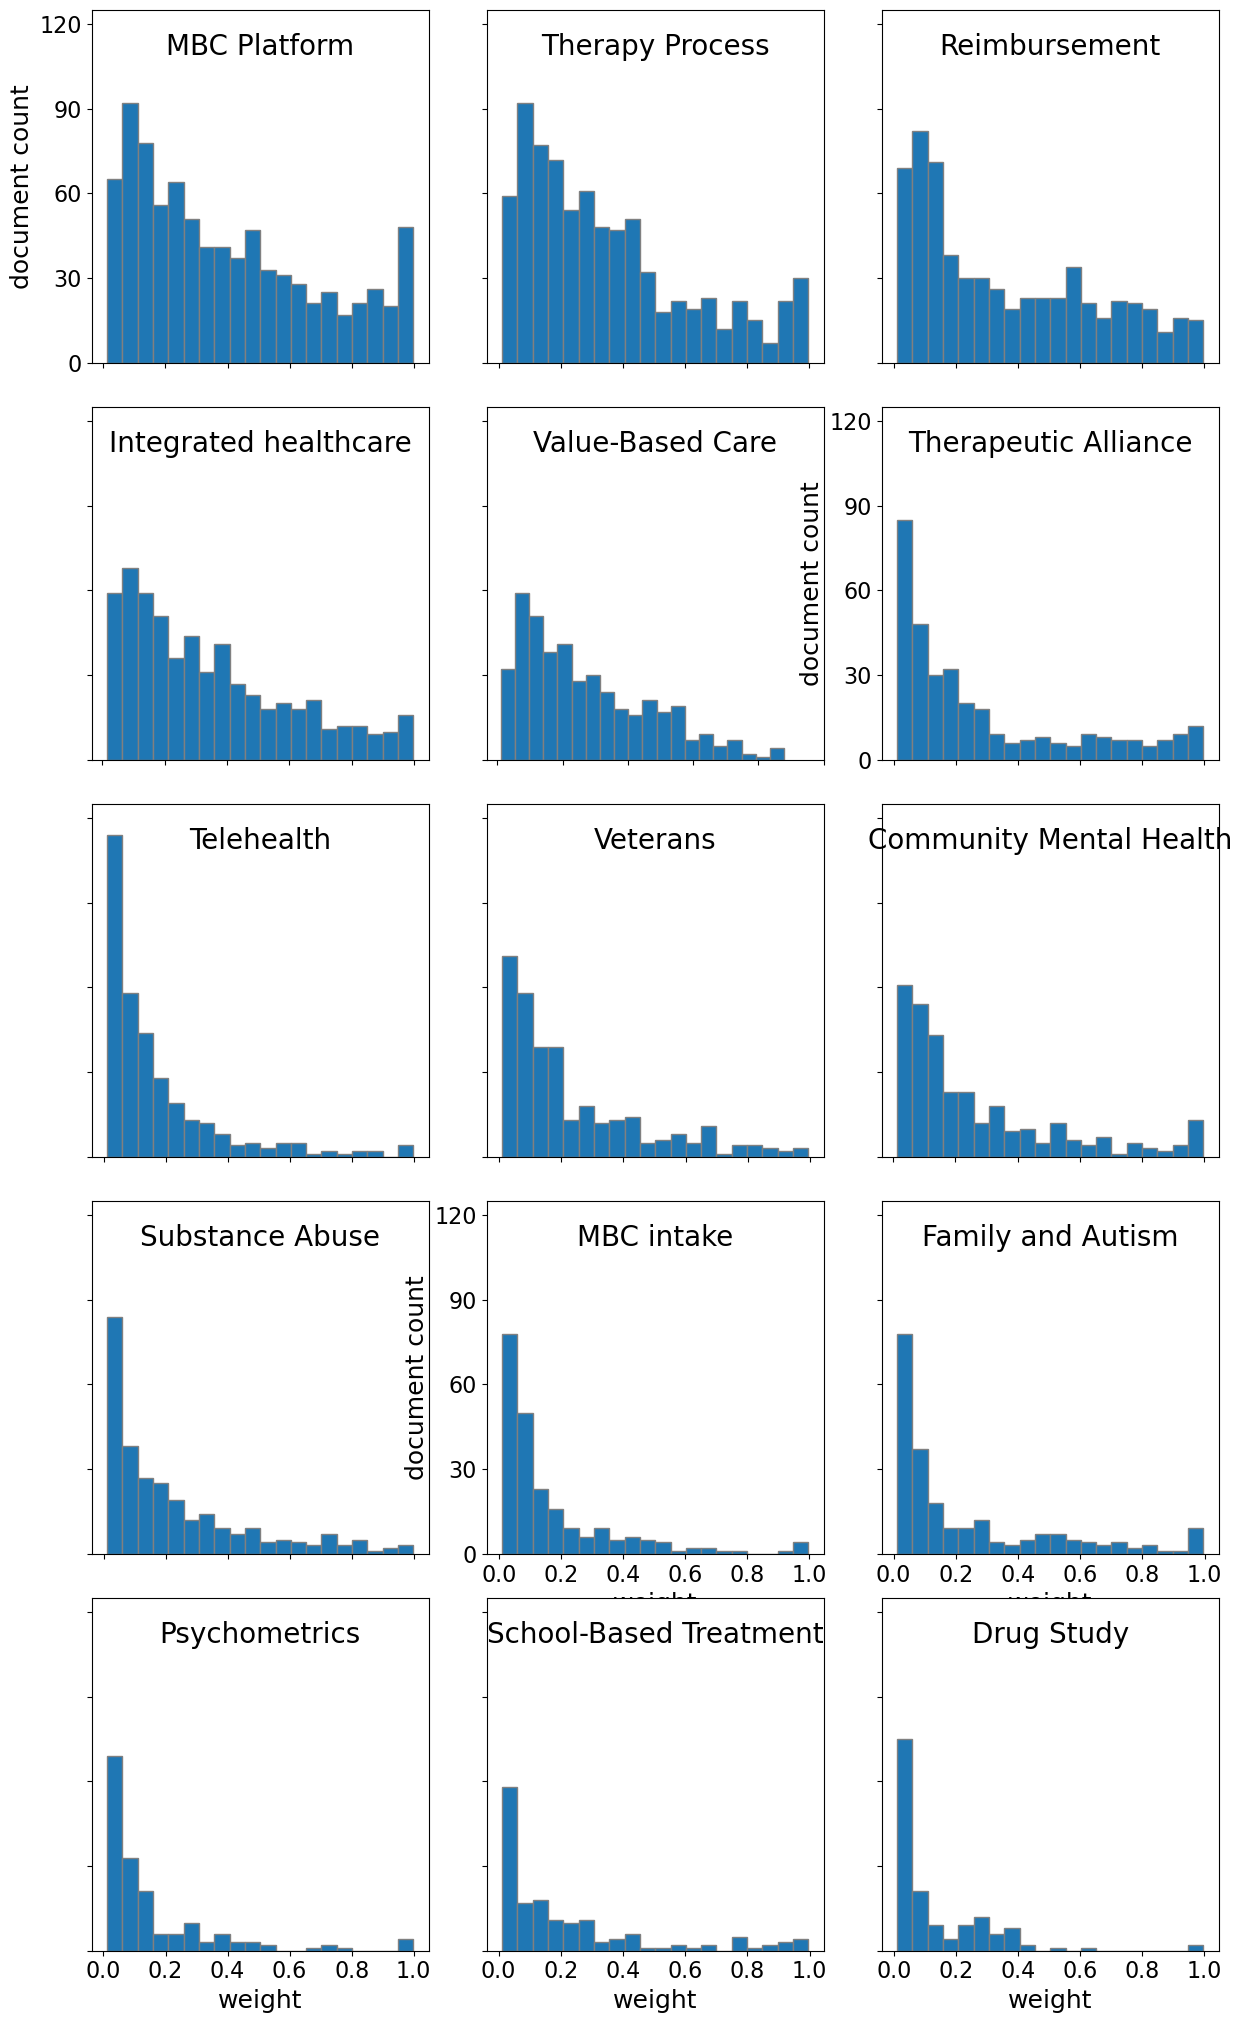

In [7]:
# Futzing with topic weight distributions to give me the stacked histograms
f, axs = plt.subplots(nrows=5, ncols=3, figsize=(12, 20))
f.tight_layout()
axs = axs.flatten()
counter = 0

for count, topic_name in enumerate(topic_order_df.index):
    bool1 = full_2v1.topic == topic_name
    bool2 = full_2v1.weight != 0
    temp_hold = full_2v1[bool1&bool2].weight
#     temp_hold = full_2v1[bool1].weight

#     sns.distplot(temp_hold, ax = axs[counter])
    axs[counter].hist(temp_hold, bins = 20, edgecolor = 'gray') #int(round(100*temp_hold.max(),0)), edgecolor = 'gray')
    axs[counter].set_title(topic_name, fontsize = 20, x=0.5, y=0.85) #y = 1.0, pad = -15)
#     if (count-1)%4 == 0:
#     axs[counter].set_ylabel('mean weight', fontsize = 10)

    axs[counter].set_xlabel('', fontsize = 20)
    axs[counter].set_ylim([0, 125])
    axs[counter].tick_params(axis='both', labelsize=16)
    if (counter)%5 == 0:
        axs[counter].set_ylabel('document count', fontsize = 18)
        axs[counter].set_yticks([0, 30, 60, 90, 120])
    else:
        axs[counter].set_ylabel('', fontsize = 16)
        axs[counter].set_yticks([0, 30, 60, 90, 120])
        axs[counter].set_yticklabels([])
    if (counter)>= 10:
        axs[counter].set_xlabel('weight', fontsize = 18)
        axs[counter].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
 #         axs[counter].set_xticklabels(fontsize = 15)
    else:
        axs[counter].set_xlabel('', fontsize = 16)
        axs[counter].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        axs[counter].set_xticklabels([])

    counter = counter + 1

plt.savefig("topic_weights_histograms.png", pad_inches = 0.5, bbox_inches = "tight")

[Text(0, 0.5, 'MBC intake'),
 Text(0, 1.5, 'Telehealth'),
 Text(0, 2.5, 'School-Based Treatment'),
 Text(0, 3.5, 'Drug Study'),
 Text(0, 4.5, 'Reimbursement'),
 Text(0, 5.5, 'Substance Abuse'),
 Text(0, 6.5, 'Therapeutic Alliance'),
 Text(0, 7.5, 'Community Mental Health'),
 Text(0, 8.5, 'MBC Platform'),
 Text(0, 9.5, 'Veterans'),
 Text(0, 10.5, 'Value-Based Care'),
 Text(0, 11.5, 'Therapy Process'),
 Text(0, 12.5, 'Integrated healthcare'),
 Text(0, 13.5, 'Family and Autism'),
 Text(0, 14.5, 'Psychometrics')]

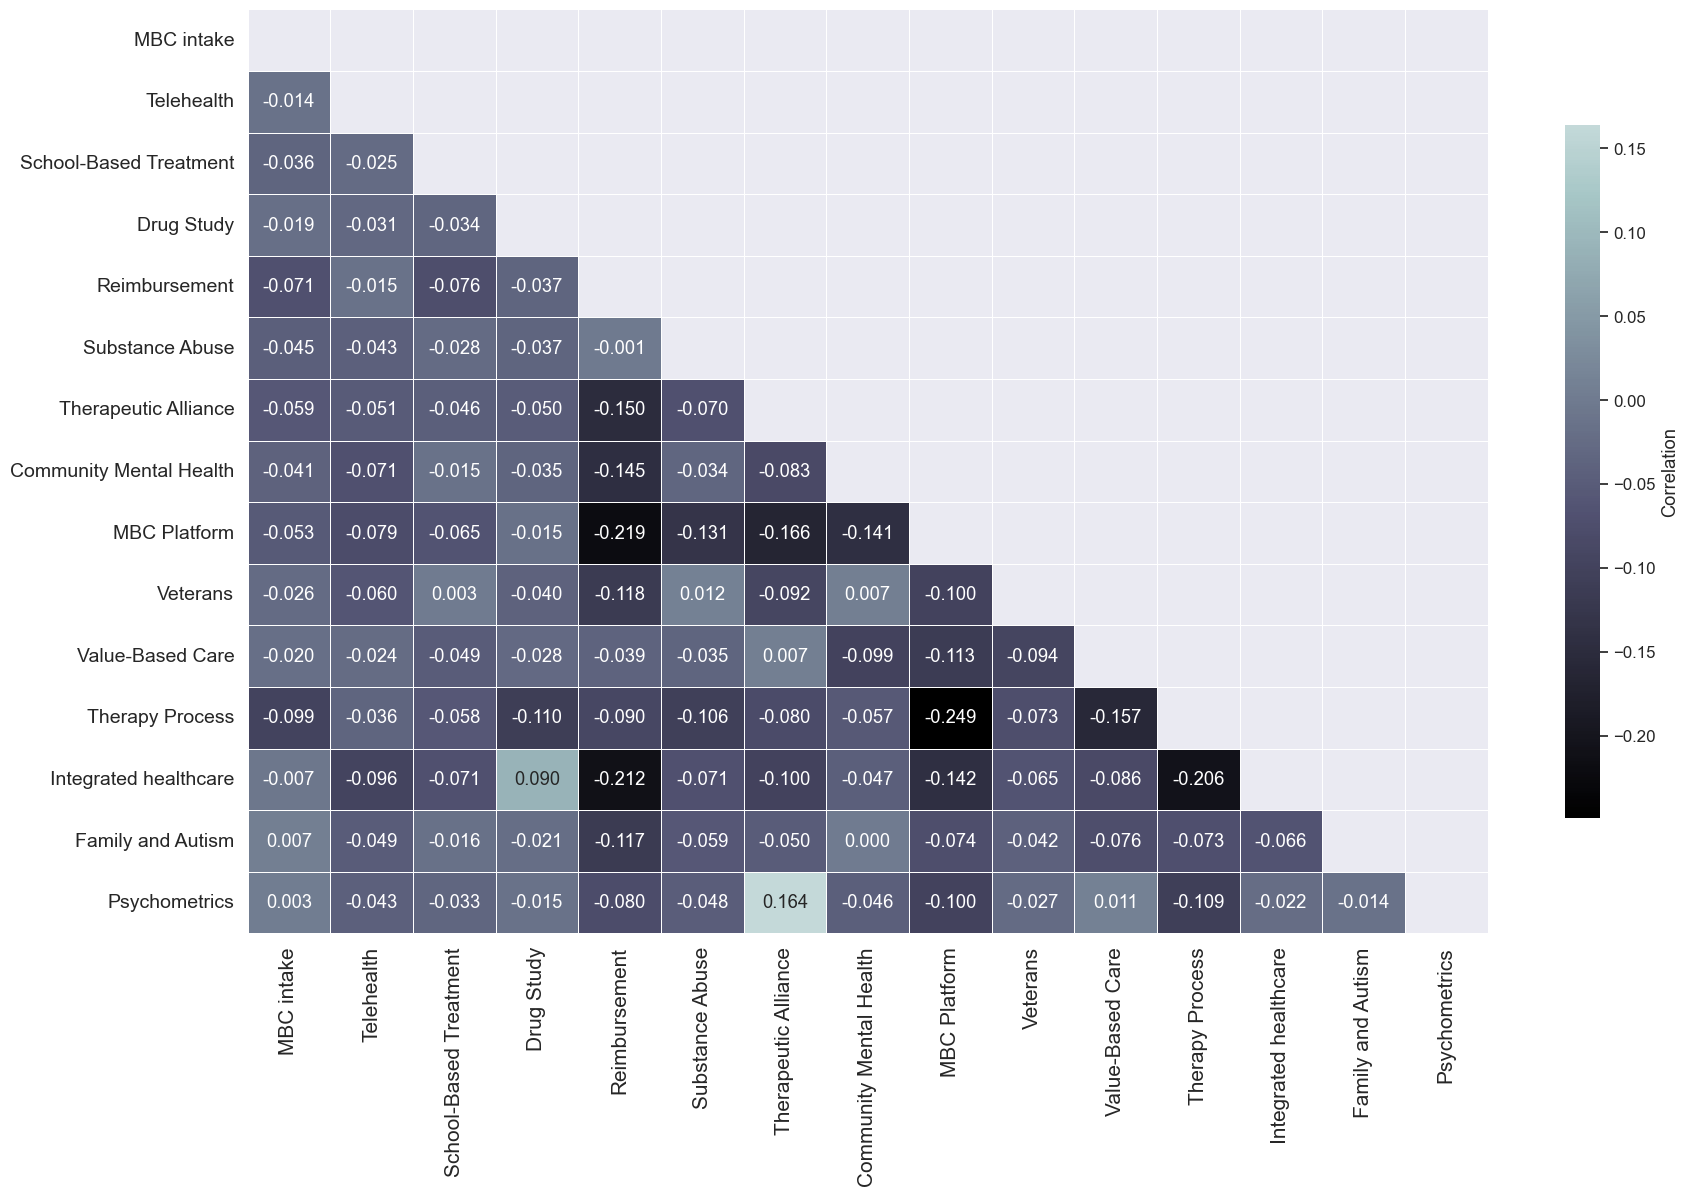

In [10]:
#Get a dataset that is just the topics and their weights
# full_2x = copy.deepcopy(full_2)
# full_2x.pop('pub_year')

# Calculate the correlations between topics in the documents
corr = full_2x.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(20,12))
sns.set(font_scale=1.1)
res = sns.heatmap(corr, cmap = 'bone',  mask = mask, center=0, linewidths=.5, cbar_kws={"orientation": "vertical", "shrink": 0.75, 'label': 'Correlation'}, annot = True, fmt = '0.3f') #cbar_kws={"shrink": .5},
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15)

res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)

In [11]:
full_3 = pd.pivot_table(full_2, values = ['MBC intake', 'Telehealth', 'School-Based Treatment', 'Drug Study', 'Reimbursement',

                                'Substance Abuse', 'Therapeutic Alliance', 'Community Mental Health', 'MBC Platform', 'Veterans',

                                'Value-Based Care', 'Therapy Process', 'Integrated healthcare', 'Family and Autism', 'Psychometrics', 'Company Type'], columns = "Company", aggfunc = [np.mean])

 
full_3.columns = full_3.columns.droplevel()

In [12]:
full_3

Company,Azzly,BHWorks,Better Outcomes Now,Blueprint Health,Celesthealth,Greenspace Health,Holmusk,Horizon Health,Ksana Health,M3 Information,Mirah,Myoutcomes,NView,Neuroblu,Neuroflow,Nextsteps Solutions,OQ Measures,Owl Health,Sivercloud Health,Tridiuum,Valant,Vivi Health
Community Mental Health,0.017976,0.003461,0.002096,0.013876,0.003247,0.042758,0.005306,0.017684,0.030482,0.000000,0.024106,0.008128,0.070888,0.000000,0.030693,0.174341,0.016689,0.057616,0.056570,0.086856,0.031000,0.004072
Drug Study,0.001628,0.003484,0.001089,0.002860,0.005390,0.002137,0.110917,0.012088,0.007064,0.001444,0.005419,0.000000,0.002389,0.352074,0.003049,0.004186,0.001603,0.012787,0.002295,0.000967,0.012064,0.002120
Family and Autism,0.006083,0.002880,0.012453,0.000000,0.094537,0.017817,0.028941,0.000000,0.030829,0.000000,0.014839,0.010531,0.038512,0.039190,0.010295,0.037721,0.006555,0.012134,0.083447,0.007005,0.009285,0.000000
Integrated healthcare,0.015133,0.045950,0.018685,0.128184,0.033545,0.011345,0.211717,0.033757,0.077457,0.711772,0.014690,0.018691,0.135516,0.214640,0.190767,0.070067,0.055730,0.113614,0.228445,0.159012,0.048528,0.059238
MBC Platform,0.056902,0.118142,0.016419,0.043356,0.052097,0.198228,0.548888,0.467048,0.556384,0.041457,0.225196,0.095194,0.203289,0.219471,0.341043,0.021943,0.177735,0.358913,0.273068,0.327970,0.086313,0.266037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Telehealth,0.034410,0.032465,0.002220,0.052199,0.050907,0.045625,0.010408,0.009574,0.022523,0.011397,0.036812,0.055702,0.025472,0.020069,0.018549,0.032650,0.022770,0.026518,0.015443,0.058575,0.060897,0.033578
Therapeutic Alliance,0.005859,0.003059,0.583567,0.119199,0.182216,0.031481,0.008360,0.000000,0.029781,0.000000,0.032939,0.388636,0.002315,0.018460,0.004677,0.005979,0.185326,0.002188,0.021620,0.017014,0.010864,0.012848
Therapy Process,0.088518,0.035726,0.062318,0.198705,0.000000,0.053728,0.009885,0.039923,0.040970,0.003654,0.116891,0.211611,0.075977,0.000000,0.181441,0.271958,0.065785,0.036394,0.238633,0.154914,0.212961,0.120228
Value-Based Care,0.056364,0.048606,0.121315,0.270795,0.012174,0.534535,0.009879,0.067720,0.078608,0.025114,0.434631,0.127485,0.085868,0.050110,0.038009,0.030186,0.202626,0.169028,0.012631,0.052441,0.068535,0.119535


[Text(0, 0.5, 'Azzly'),
 Text(0, 1.5, 'BHWorks'),
 Text(0, 2.5, 'Better Outcomes Now'),
 Text(0, 3.5, 'Blueprint Health'),
 Text(0, 4.5, 'Celesthealth'),
 Text(0, 5.5, 'Greenspace Health'),
 Text(0, 6.5, 'Holmusk'),
 Text(0, 7.5, 'Horizon Health'),
 Text(0, 8.5, 'Ksana Health'),
 Text(0, 9.5, 'M3 Information'),
 Text(0, 10.5, 'Mirah'),
 Text(0, 11.5, 'Myoutcomes'),
 Text(0, 12.5, 'NView'),
 Text(0, 13.5, 'Neuroblu'),
 Text(0, 14.5, 'Neuroflow'),
 Text(0, 15.5, 'Nextsteps Solutions'),
 Text(0, 16.5, 'OQ Measures'),
 Text(0, 17.5, 'Owl Health'),
 Text(0, 18.5, 'Sivercloud Health'),
 Text(0, 19.5, 'Tridiuum'),
 Text(0, 20.5, 'Valant'),
 Text(0, 21.5, 'Vivi Health')]

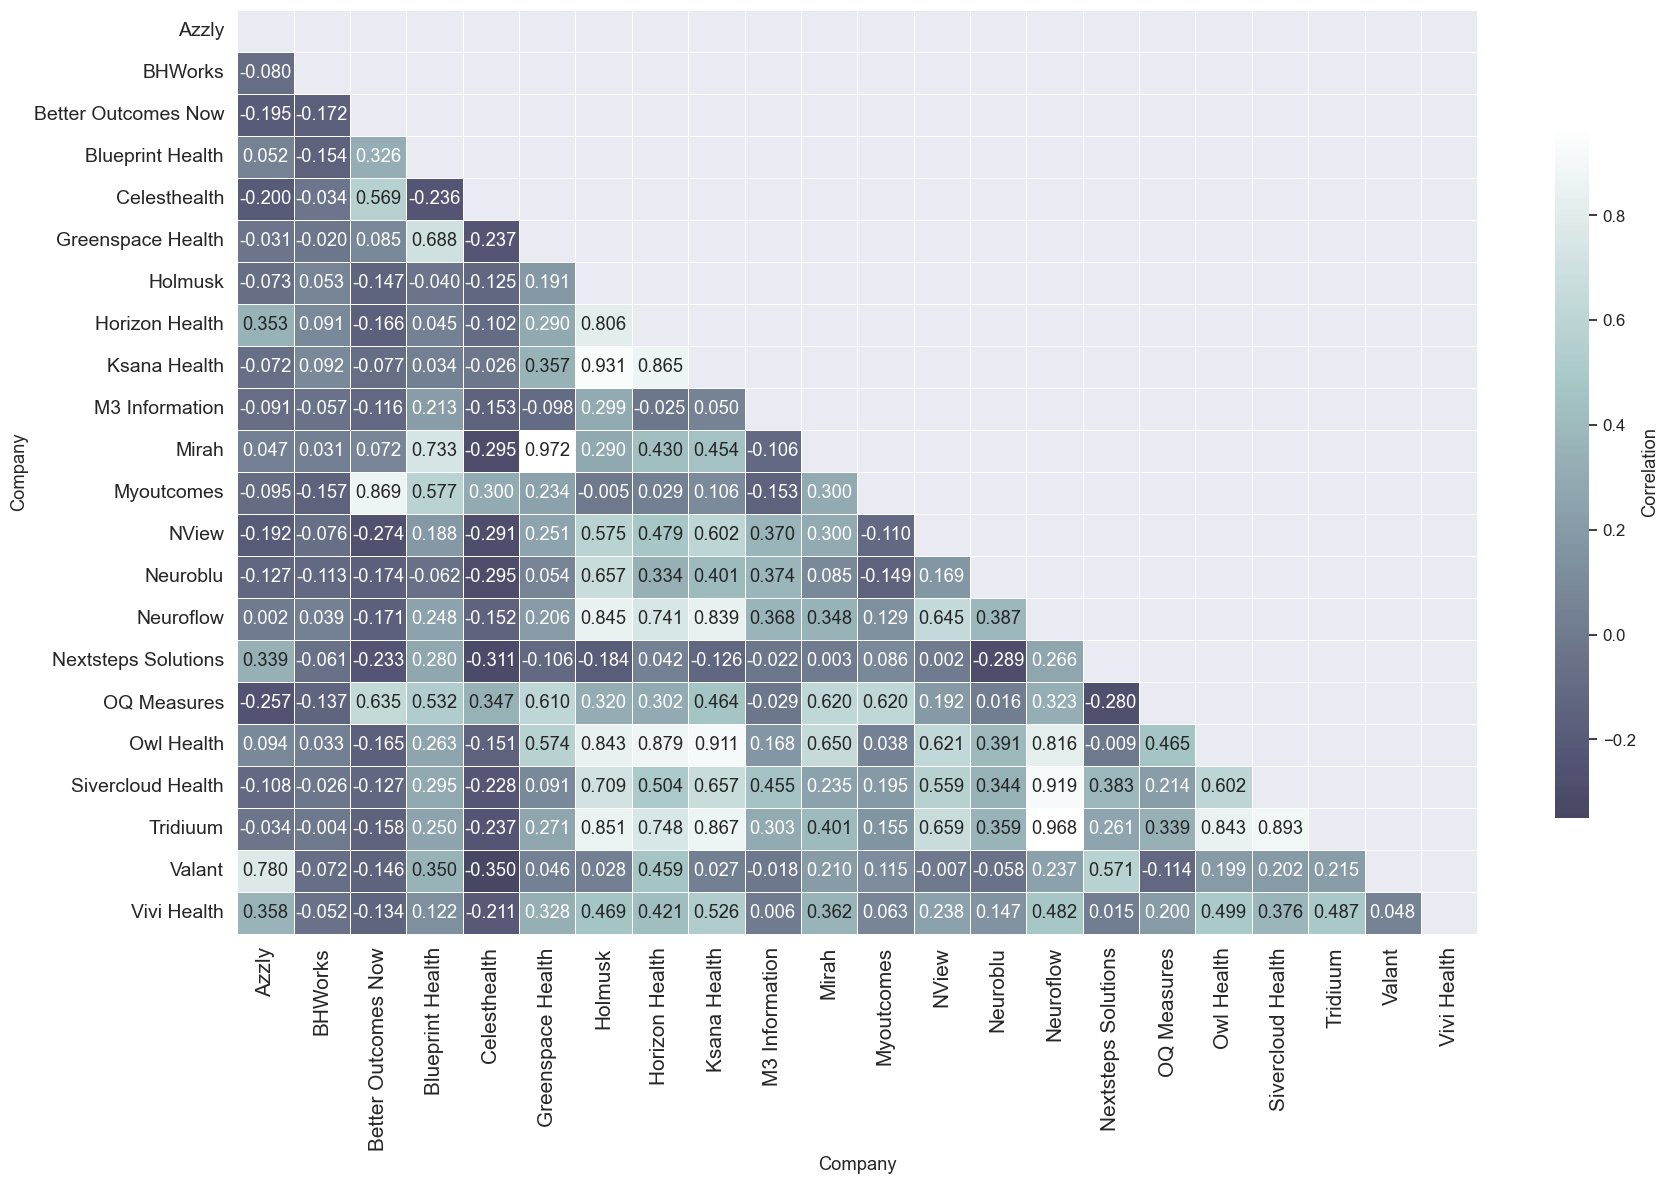

In [13]:
# Calculate the correlations between companies
corr = full_3.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(20,12))
sns.set(font_scale=1.1)
res = sns.heatmap(corr, cmap = 'bone',  mask = mask, center=0, linewidths=.5, cbar_kws={"orientation": "vertical", "shrink": 0.75, 'label': 'Correlation'}, annot = True, fmt = '0.3f') #cbar_kws={"shrink": .5},
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15)

res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)

In [11]:
corr2 = corr.reset_index()
corr2.rename(columns = {'index':'topic_1'}, inplace = True)
corr3 = corr2.melt(id_vars = ['topic_1'])
corr3.columns = ['topic_1', 'topic_2', 'correlation']
corr3.sort_values('correlation')

bool1 = corr3.topic_1 == corr3.topic_2
pd.set_option('display.max_rows', None)
corr4 = corr3[~bool1].drop_duplicates('correlation').sort_values('correlation', ascending = True)
corr4.to_csv("Sorted Correlation of Topics.csv")

<AxesSubplot:>

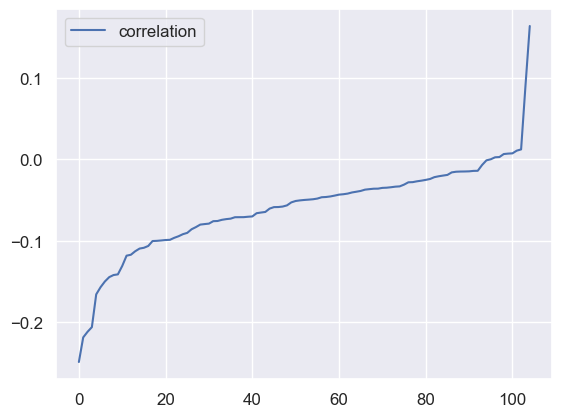

In [16]:
corr4.reset_index(inplace = True)
corr4.pop('index')
corr4.plot()